<a href="https://colab.research.google.com/github/sebas-prog/Econometria-/blob/main/Proyecto_final_de_enaho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisís de la base de datos del enaho 

En el siguiente cuaderno de jupyter implementaremos diferentes algoritmos de machine learnig para la predicción de aquellas personas que esten dentro de la linea de pobreza. Comenzaremos primero realizando un **EDA** y después haremos el modelamieto y el analisís. Al final se usara **pycaret**.

## EDA


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Se carga la base datos 

In [38]:
base = pd.read_csv("/content/ata.csv")
base.head()

,conglome,vivienda,hogar,computadora,refri_conge,lavadora,maq_coser,autocamioneta,motocicleta,triciclo,...,noserv_pub,siserv_pub,miembros,ingreso_mon_bruto,ingreso_mon_neto,ingreso_bruto,ingreso_totalneto,gasto_mon,gasto_bruto,pobre
0,5002,11,11,si,si,si,si,0,0,0,...,0,1,4.0,66237.0,55151.0,71943.773438,60857.773438,25394.298828,31101.072266,0.0
1,5002,23,11,si,si,si,0,0,0,0,...,0,1,1.0,32175.0,32175.0,35995.777344,35995.777344,20104.525391,23925.304688,0.0
2,5002,49,11,si,si,si,0,0,0,0,...,0,1,4.0,70922.0,68047.0,106738.781250,103863.781250,67529.304688,104344.078125,0.0
3,5002,73,11,0,0,si,0,0,si,0,...,0,1,2.0,50016.0,50016.0,55364.609375,55364.609375,22821.716797,28170.324219,0.0
4,5002,97,11,0,0,0,0,0,0,0,...,0,1,1.0,4684.0,4684.0,6020.540527,6020.540527,2605.322754,3941.863525,0.0


Después de carga la base de datos se procede a realizar un analisis descripto de la data

In [39]:
base.describe()

,conglome,vivienda,hogar,ubigeo,cocina,asociaciones,codperso,remesa,pension_jubilacion,edad2,...,noserv_pub,siserv_pub,miembros,ingreso_mon_bruto,ingreso_mon_neto,ingreso_bruto,ingreso_totalneto,gasto_mon,gasto_bruto,pobre
count,53423.000000,53423.000000,53423.000000,53423.000000,34490.000000,17413.000000,34490.0,34480.000000,34480.000000,34490.000000,...,53423.000000,53423.000000,34490.000000,34490.000000,34490.000000,34490.000000,34490.000000,34490.000000,34490.000000,34490.000000
mean,11563.344028,75.734553,11.088950,131439.513580,0.864975,0.191638,1.0,0.079379,0.061746,2974.061148,...,0.008405,0.372087,3.489301,22057.606619,20573.616639,29364.095144,28095.246692,16282.323186,23345.118871,0.223949
std,5023.780304,70.497605,1.133496,66994.276165,0.341755,0.393601,0.0,0.270334,0.240697,1660.236817,...,0.091292,0.483366,1.836693,29128.666019,26309.103301,32560.684086,29894.472846,14826.519050,18238.734314,0.416894
min,5002.000000,1.000000,11.000000,10101.000000,0.000000,0.000000,1.0,0.000000,0.000000,256.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,105.611794,105.611794,10.642857,792.651672,0.000000
25%,7272.000000,28.000000,11.000000,80105.000000,1.000000,0.000000,1.0,0.000000,0.000000,1681.000000,...,0.000000,0.000000,2.000000,5797.250000,5580.000000,10511.566162,10511.348877,6519.994019,11394.790283,0.000000
50%,9528.000000,61.000000,11.000000,140113.000000,1.000000,0.000000,1.0,0.000000,0.000000,2704.000000,...,0.000000,0.000000,3.000000,12855.500000,12494.642578,19303.979492,19125.257812,12242.672852,18547.383789,0.000000
75%,16828.000000,103.000000,11.000000,180301.000000,1.000000,0.000000,1.0,0.000000,0.000000,3969.000000,...,0.000000,1.000000,5.000000,27439.678711,26000.000000,36223.769531,34902.278320,21362.858887,29726.603027,0.000000
max,20353.000000,886.000000,55.000000,250401.000000,1.000000,1.000000,1.0,1.000000,1.000000,9604.000000,...,1.000000,1.000000,20.000000,889271.000000,886668.000000,894943.437500,892340.437500,303279.281250,318902.968750,1.000000


Ahora veremos los datos ausentes o mising values 

In [40]:
base.isnull().sum()/53423*100

conglome               0.000000
vivienda               0.000000
hogar                  0.000000
computadora           35.662542
refri_conge           35.643824
lavadora              35.677517
maq_coser             67.626303
autocamioneta         35.698108
motocicleta           35.711211
triciclo              67.628175
mototaxi              67.628175
camion                67.630047
ubigeo                 0.000000
cocina                35.439792
asociaciones          67.405425
codperso              35.439792
remesa                35.458510
pension_jubilacion    35.458510
edad2                 35.439792
edad                  35.439792
n_miembros            35.439792
hombre                35.439792
mujer                 35.439792
lengua                35.439792
e_sinnivel            35.452895
e_inicial             35.452895
e_primaria            35.452895
e_secundaria          35.452895
e_superior            35.452895
result                 0.000000
n_habitaciones        36.027554
factor07

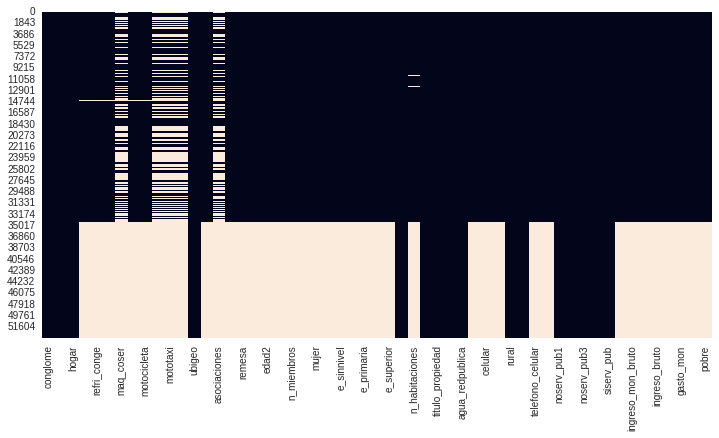

In [41]:
sns.heatmap(base.isnull(), cbar=False)
plt.gcf().set_size_inches(12,6)
plt.show()

En este caso se puede observar que existen variables en donde el porcentaje de datos asusentes es del 67%, por lo tanto se puede observar en la primera linea de codigo las variables de mayor porcentaje de **NA** y en la segunda se observa el grafico en donde las lineas de color negro representan los valores ausentes.

Graficos de los valores de algunas variables de importancia

Se crea una nueva variable que se reemplensenta como todoslos grados o niveles de educacion. 

In [42]:
base["nivel_total"]= base.e_inicial+base.e_primaria+base.e_secundaria+base.e_superior
base["nivel_total"].value_counts()

3.0    10787
2.0     9641
4.0     6307
1.0     5986
0.0     1762
Name: nivel_total, dtype: int64

En este caso 0 representan las personas que o poseen ningun nivel de educación hasta personas que poseen el nivel más alto de eduacación que es la universitaria.

Despues de hacer esto se transforma a tipo objeto

In [43]:
base["nivel_total"]= base["nivel_total"].astype("object")

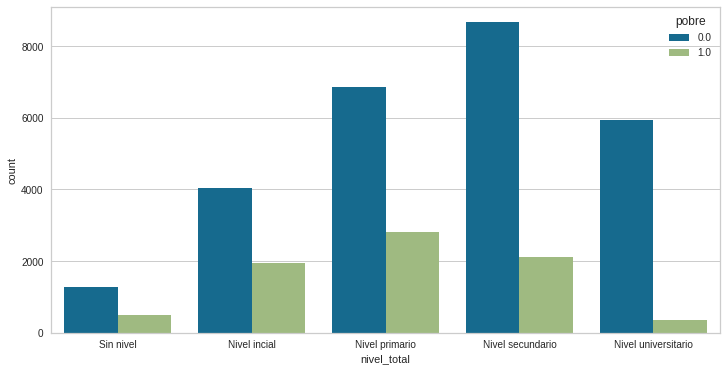

In [44]:
mylabel=["Sin nivel","Nivel incial", "Nivel primario", "Nivel secundario", "Nivel universitario"]
ax= sns.countplot(data=base,x='nivel_total',hue="pobre")
plt.xticks(ticks = [0,1,2,3,4], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.show()


> En la siguiente imagen se puede observar que existen un bajo nivel de gente en estado de pobreza para 
aquellos encuestados que presentan nivel univerisatatio.

Ahora trabajamos con la variable mienbros de la familia 

In [45]:
base["miembros"].value_counts()

4.0     7235
2.0     6890
3.0     6881
1.0     4661
5.0     4553
6.0     2249
7.0     1047
8.0      496
9.0      251
10.0     114
11.0      52
12.0      31
13.0      13
14.0      10
15.0       4
18.0       1
20.0       1
16.0       1
Name: miembros, dtype: int64

Se puede obsevar que solo hay pocas familias de un numero mayor de habitantes por lo que combiene transformar esta variable en dos categorias para no tener problemas después de realizar la validadción cruzada.

In [10]:
base["mienbros"]= base.n_miembros.apply(lambda x: "1" if x >=4  else "0")

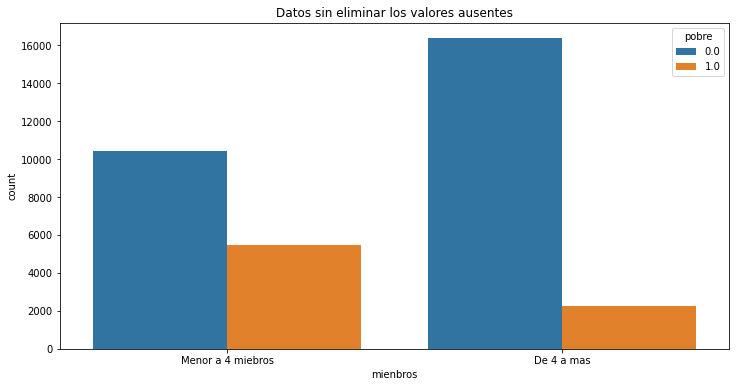

In [11]:
mylabel= ["Menor a 4 miebros","De 4 a mas"]
sns.countplot(data=base,x='mienbros',hue="pobre")
plt.xticks(ticks = [0,1], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.title("Datos sin eliminar los valores ausentes")
plt.show()

> En la imagen se observa que la existen un mayor numero de personas en situacion de pobreza cuando aumenta el numero de mienbros por familia. 

El siguiete paso es extraer en el codigo ubigeo la region pues con esto podemos extraer de que departamento es el encuestado 


In [12]:
base["region"]="ata"

for i in range(0,len(base)):
    if len(str(base.ubigeo[i]))==5:
        base["region"][i]=str(base["ubigeo"][i])[0]
    else:
        base["region"][i]=str(base["ubigeo"][i])[0:2]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


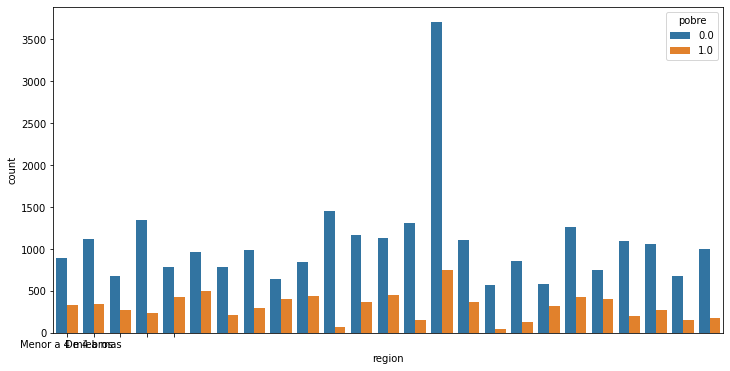

In [13]:
sns.countplot(data=base,x="region",hue="pobre")
plt.xticks(ticks = [0,1,2,3,4], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.show()

Como se puede ver se genero 25 variables del tipo categoricas esto implica que cuando la transformemos a variables dummys se generaran un total de 25 variables más por lo que convienen mejor transformar esta variable en tres categorias que son: costa, selva y sierra. Estas son tras regiones del **Perú**.

In [14]:
base["region"]= base["region"].astype("str")

In [15]:
costa  = {
                '1': 'se', '2':'c','3':'s','4':'c','5':'s','6':'s','7':'c','8':'s','9':'s',
                '10':'s','11':'c','12':'s','13':'c','14':'c','15':'c','16':'se','17':'se',
                '18':'c','19':'s','20':'c','21':'s','22':'se','23':'c','24':'c','25':'se'}
                
base["regionc"] = base["region"].map(costa)
base["regionc"].head()

0    se
1    se
2    se
3    se
4    se
Name: regionc, dtype: object

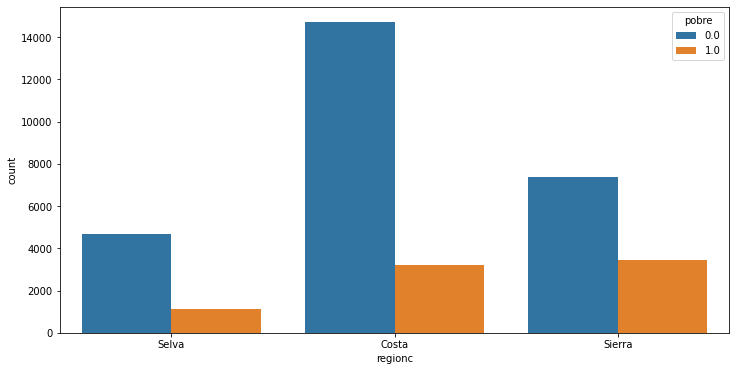

In [16]:
mylabel= ["Selva","Costa","Sierra"]
sns.countplot(data=base,x="regionc",hue="pobre")
plt.xticks(ticks = [0,1,2], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.show()

Con esto ya podemos vizualizar los 25 departamentos del peru el siguiente paso es determinar si pertenecen a la region costa sierra o selva

La variable sexo 

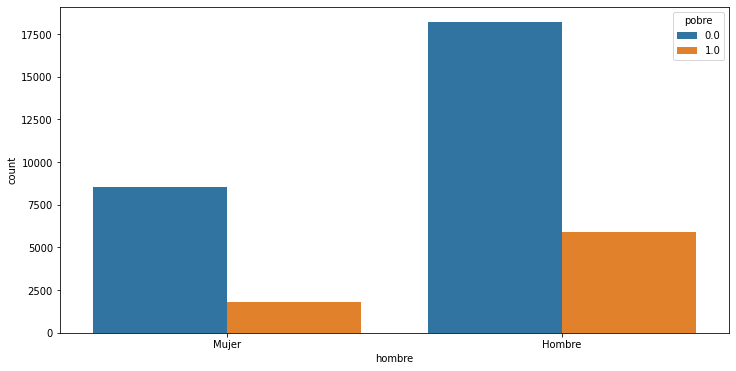

In [17]:
mylabel= ["Mujer","Hombre"]
sns.countplot(data=base,x="hombre",hue="pobre")
plt.xticks(ticks = [0,1], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.show()

La variable edad

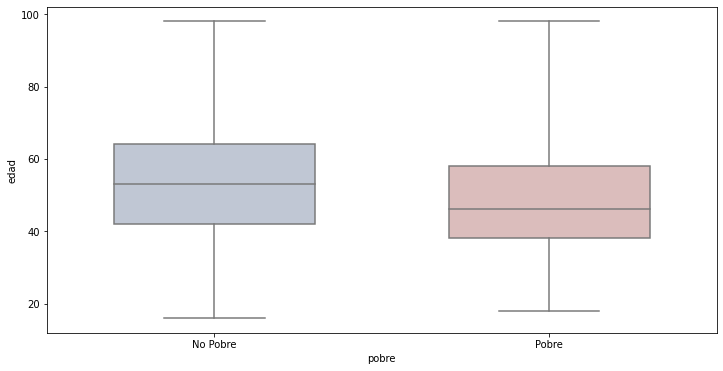

In [18]:
mylabel= ["No Pobre","Pobre"]
sns.boxplot(x="pobre", y="edad", data=base,
            whis=[0, 100], width=.6, palette="vlag")
plt.xticks(ticks = [0,1], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.show()

Se puede observar que la mediana es menor para las personas pobres por lo que se puede decir que existe una mayor porporción de personas menores de edad dentro del grupo de personas de un estracto social menos alto.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


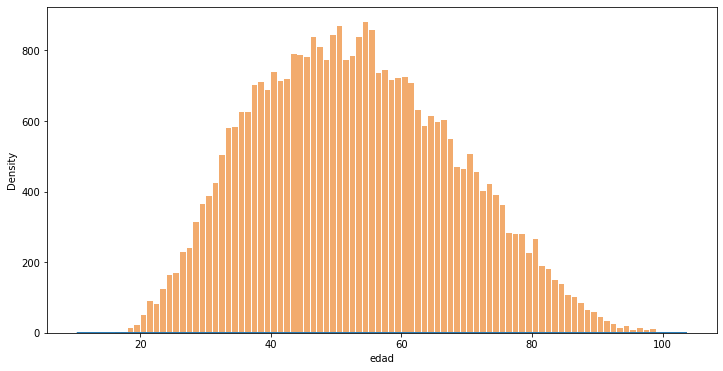

In [19]:
intervalos = range(16,100)
plt.hist(x=base["edad"], bins=intervalos, color='#F2AB6D', rwidth=0.85)
sns.distplot(base["edad"])
plt.gcf().set_size_inches(12,6)
plt.show()

Anilisís de la variable ingreso

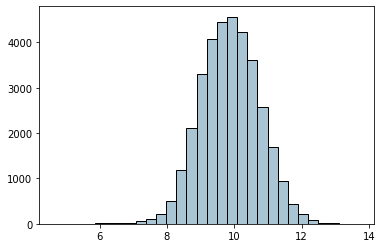

In [20]:
base["log_ingreso"]= np.log(base.ingreso_totalneto.values) # Se transforma a un logaritmo
base['log_ingreso'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
plt.show()

Como se puede ver existen valores atípicos por lo que conviene transformar esta variable a categórica mediante los cuartiles:

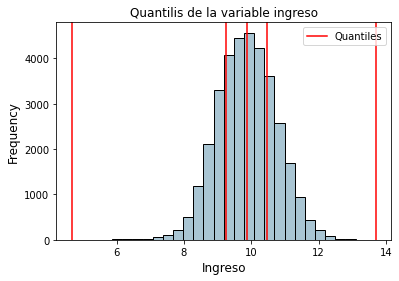

In [21]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = base['log_ingreso'].quantile(quantile_list)

fig, ax = plt.subplots()
base['log_ingreso'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Quantilis de la variable ingreso', 
             fontsize=12)
ax.set_xlabel('Ingreso', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [22]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
d = pd.qcut(
                                            base['log_ingreso'], 
                                            q=quantile_list,labels=quantile_labels)

Variable gasto

In [23]:
base["log_gasto_mon"]= np.log(base["gasto_mon"].values)

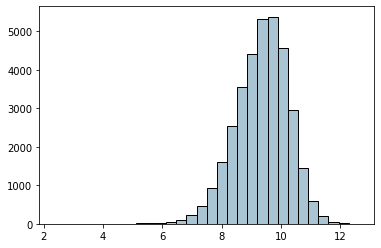

In [24]:
fig, ax = plt.subplots()
base['log_gasto_mon'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
plt.show()

Como se puede ver existen valores atípicos por lo que conviene transformar esta variable a categórica mediante los cuartiles:


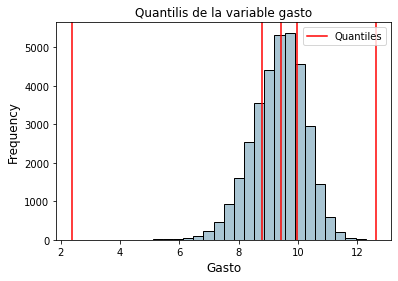

In [25]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = base['log_gasto_mon'].quantile(quantile_list)
quantiles

fig, ax = plt.subplots()
base['log_gasto_mon'].hist(bins=30, color='#A9C5D3', 
                             edgecolor='black', grid=False)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)
ax.set_title('Quantilis de la variable gasto', 
             fontsize=12)
ax.set_xlabel('Gasto', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
plt.show()

In [26]:
quantile_labels = ['0-25QG', '25-50QG', '50-75QG', '75-100QG']
d1 = pd.qcut(
                                           base['log_gasto_mon'], 
                                            q=quantile_list,labels=quantile_labels)

In [27]:
base["ingreso_nuevo"]=d
base["gasto_nuevo"]=d1

## Selección y limpieza final de las variables

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34490 entries, 0 to 34489
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pobre               34490 non-null  object 
 1   agua_redpublica     34490 non-null  object 
 2   desague_redpublica  34490 non-null  object 
 3   alumbrado_publico   34490 non-null  object 
 4   telefono_celular    34490 non-null  object 
 5   nivel_total         34483 non-null  object 
 6   lavadora            34363 non-null  object 
 7   motocicleta         34345 non-null  object 
 8   computadora         34371 non-null  object 
 9   cocina              34490 non-null  object 
 10  refri_conge         34381 non-null  object 
 11  titulo_propiedad    34490 non-null  object 
 12  mienbros            34490 non-null  object 
 13  rural               34490 non-null  object 
 14  remesa              34480 non-null  object 
 15  hombre              34490 non-null  object 
 16  regi

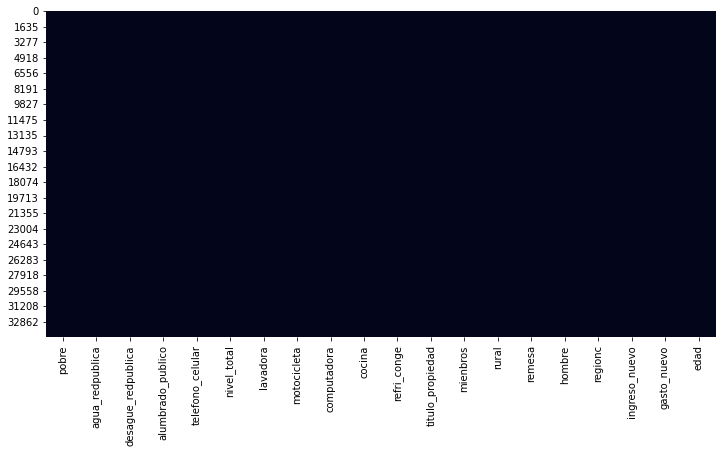

In [28]:
#  Se seleccionan las variables a utilizar

variables = ["pobre","agua_redpublica","desague_redpublica","alumbrado_publico",
                 "telefono_celular","nivel_total",
                 "lavadora","motocicleta","triciclo","mototaxi","computadora",
                 "cocina","refri_conge","titulo_propiedad","asociaciones",
               "mienbros","rural","remesa","hombre","regionc",
             "ingreso_nuevo","gasto_nuevo","edad"]

data1 = base[variables]

data1[variables]=data1[variables].astype("object")
data1["edad"] = data1["edad"].astype("float")

# Se limpia la base de datos
data1=data1.dropna(subset=["pobre"])

# Se elimina estas variables por superar el 10% de valores asuentes presentes 

data1=data1.drop(['triciclo', 'mototaxi', 'asociaciones'], axis=1)

data1.info()

data1=data1.dropna()
sns.heatmap(data1.isnull(), cbar=False)
plt.gcf().set_size_inches(12,6)
plt.show()

## Creación del modelo

In [46]:
from sklearn.preprocessing import StandardScaler # Para escalar los datos 

In [32]:
numeric_cols = data1.select_dtypes(include=['float64', 'int']).columns.to_list() #Variables numericas
cat_cols = data1.select_dtypes(include=['object', 'category']).columns.to_list() # Variables categoricas 

categorica = pd.get_dummies(data1[cat_cols],drop_first=True) # Se transforman a dummys
#categorica= pd.concat([data1["edad"],categorica],axis=1)

In [33]:
escalador = StandardScaler()
es = escalador.fit_transform(data1[numeric_cols])

In [34]:
categorica["edad"]= es

In [35]:
categorica.head()

,pobre_1.0,agua_redpublica_1,desague_redpublica_1,alumbrado_publico_1.0,telefono_celular_1.0,nivel_total_1.0,nivel_total_2.0,nivel_total_3.0,nivel_total_4.0,lavadora_si,...,hombre_1.0,regionc_s,regionc_se,ingreso_nuevo_25-50Q,ingreso_nuevo_50-75Q,ingreso_nuevo_75-100Q,gasto_nuevo_25-50QG,gasto_nuevo_50-75QG,gasto_nuevo_75-100QG,edad
0,0,1,1,1,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0.899737
1,0,1,1,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0.635484
2,0,1,1,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1.428243
3,0,1,1,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0.503358
4,0,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.824623


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train1, X_test1, y_train1, y_test1 = train_test_split(
                                        categorica.drop('pobre_1.0', axis = 'columns'),
                                        categorica['pobre_1.0'],
                                        train_size   = 0.8,
                                        random_state = 2022,
                                        shuffle      = True
                                    )

In [48]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

In [38]:
modelo = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")

In [39]:
modelo.fit(X_train1, y_train1)

LogisticRegression(class_weight='balanced', random_state=1, solver='newton-cg')

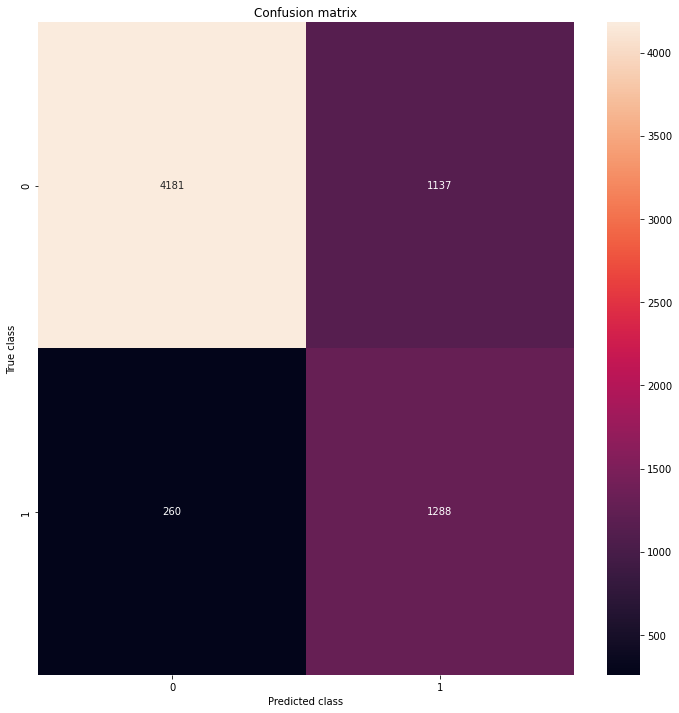

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5318
           1       0.53      0.83      0.65      1548

    accuracy                           0.80      6866
   macro avg       0.74      0.81      0.75      6866
weighted avg       0.85      0.80      0.81      6866



In [40]:
pred_y = modelo.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

Como se puede observar hemos usado la opción en donde combate el desbalanceo de los datos pues la data en su versión original presenta un desbalanceo en el siguiente grafico se vera su distribución en los datos originales y de entrenamiento. Se observa que capta de una mejor forma tanto a la clase minomitaria como la mayoritaria y además presenta un accuracy del 80%. Pero antes de realizar estos dos graficos se vera la importancia de las variables.

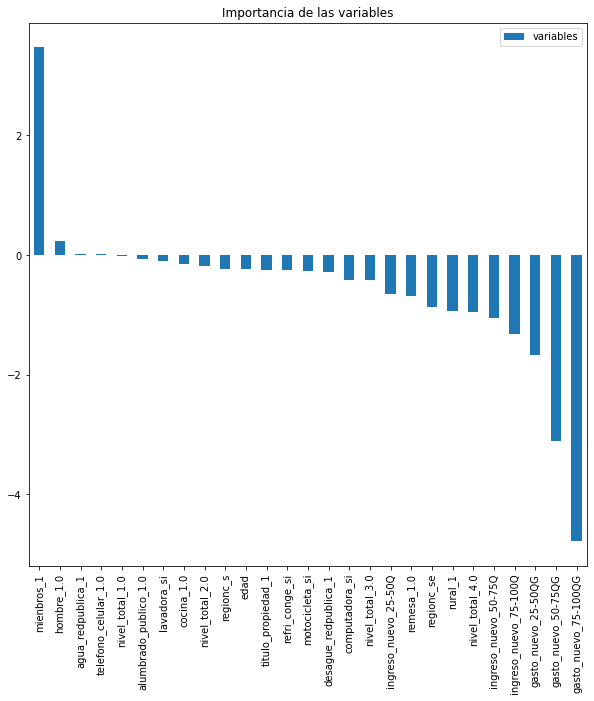

In [41]:
headers= X_train1.columns
pesos=modelo.coef_.T
var_imp = pd.DataFrame(pesos)
var_imp.index=headers
var_imp.columns= ["variables"]
var_imp.sort_values(by = 'variables', ascending=False).plot.bar(figsize=(10,10))
plt.title("Importancia de las variables")
plt.show()

Se puede observar que referente a estas variables las de mayor importancia son el gasto y el numero de mienbros. En el caso del modelo logit es un poco más facil la interpretación de los coeficientes en donde la variable mienbros es la que auementa en una mayor proporción ser de la clase 1 que es pobre y la variale gasto disminuye esa probabilidad.

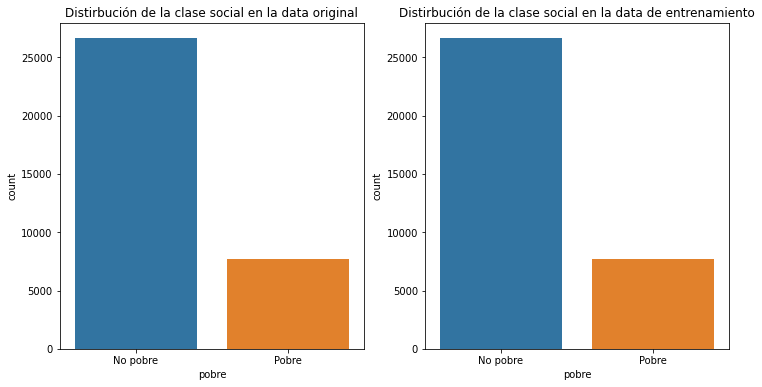

In [42]:
plt.subplot(121)
mylabel= ["No pobre","Pobre"]
sns.countplot(data=data1,x="pobre")
plt.xticks(ticks = [0,1], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.title("Distirbución de la clase social en la data original")
plt.subplot(122)
sns.countplot(data=data1,x="pobre")
plt.xticks(ticks = [0,1], labels = mylabel)
plt.gcf().set_size_inches(12,6)
plt.title("Distirbución de la clase social en la data de entrenamiento")
plt.show()

Para ello vamos a relaizar un balanceo de clases mediante el algoritmo smoth.

In [43]:
#Importamos los paquetes
from imblearn.combine import SMOTETomek

#Inicialización del método combinado
#SMOTE Tomek
smoteT = SMOTETomek(random_state = 123)#random_state = 0

X_train_res, y_train_res = smoteT.fit_resample(X_train1, y_train1)

In [44]:
y_train_res.value_counts()

0    20696
1    20696
Name: pobre_1.0, dtype: int64

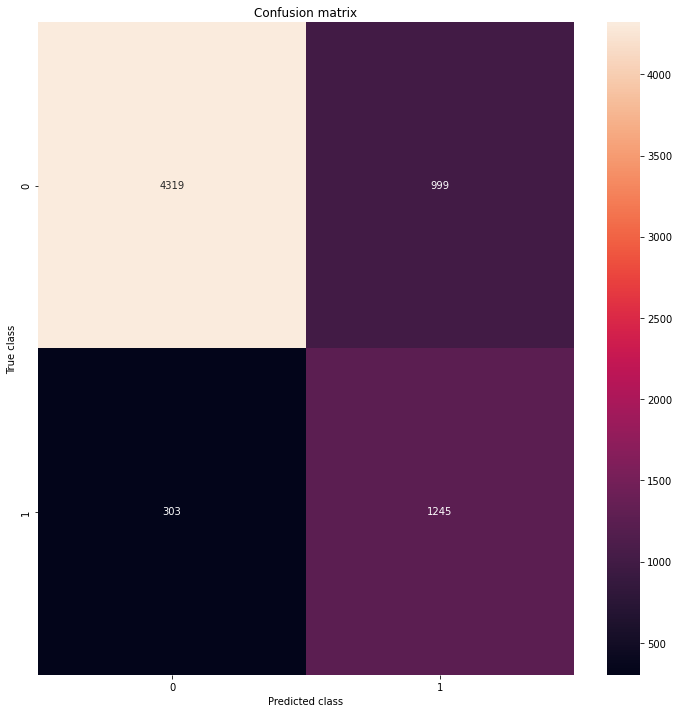

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      5318
           1       0.55      0.80      0.66      1548

    accuracy                           0.81      6866
   macro avg       0.74      0.81      0.76      6866
weighted avg       0.85      0.81      0.82      6866



In [45]:
modelo1 = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
modelo1.fit(X_train_res, y_train_res)

pred_y = modelo1.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


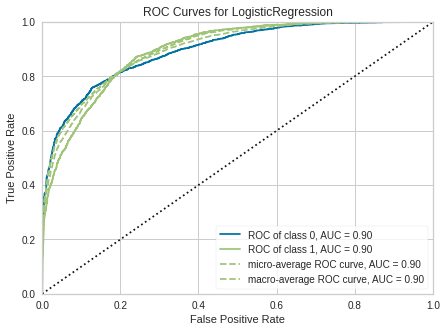

In [46]:
from yellowbrick.classifier import ROCAUC

viz = ROCAUC(modelo1,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


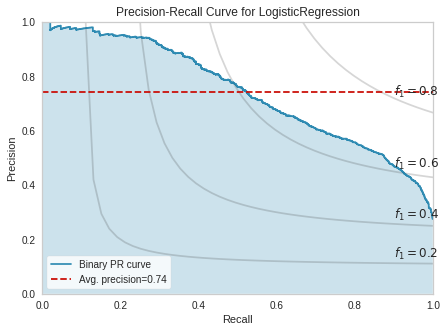

In [47]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(modelo1,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


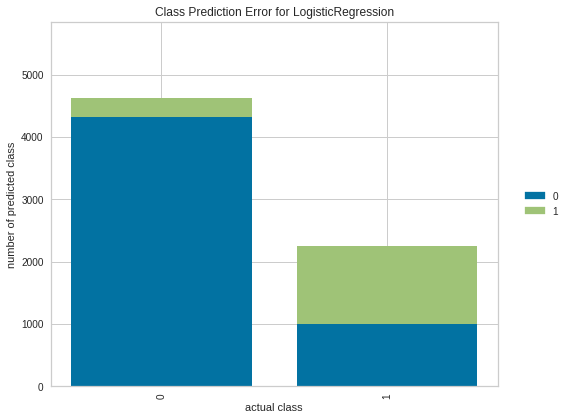

In [48]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(modelo1,
                           fig=plt.figure(figsize=(9,6)))
viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

### Modelo Knn

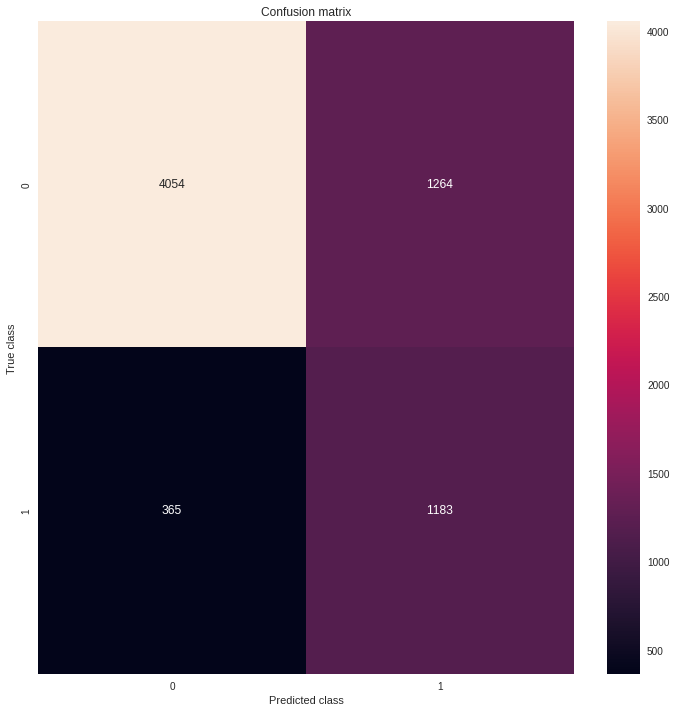

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      5318
           1       0.48      0.76      0.59      1548

    accuracy                           0.76      6866
   macro avg       0.70      0.76      0.71      6866
weighted avg       0.82      0.76      0.78      6866



In [49]:
from sklearn.neighbors import KNeighborsClassifier

modelo2 = KNeighborsClassifier()
modelo2.fit(X_train_res, y_train_res)

pred_y = modelo2.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


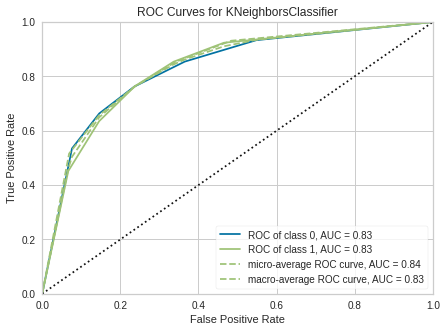

In [50]:
from yellowbrick.classifier import ROCAUC

viz = ROCAUC(modelo2,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


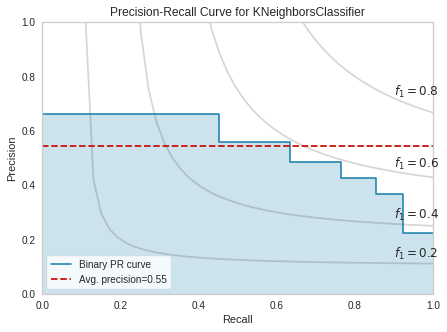

In [51]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(modelo2,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


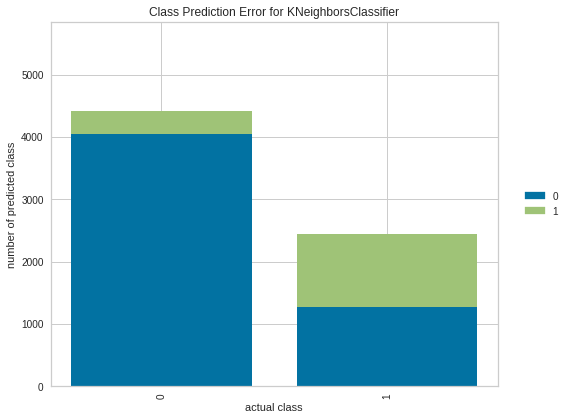

In [52]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(modelo2,
                           fig=plt.figure(figsize=(9,6)))
viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

### Arbol de decision

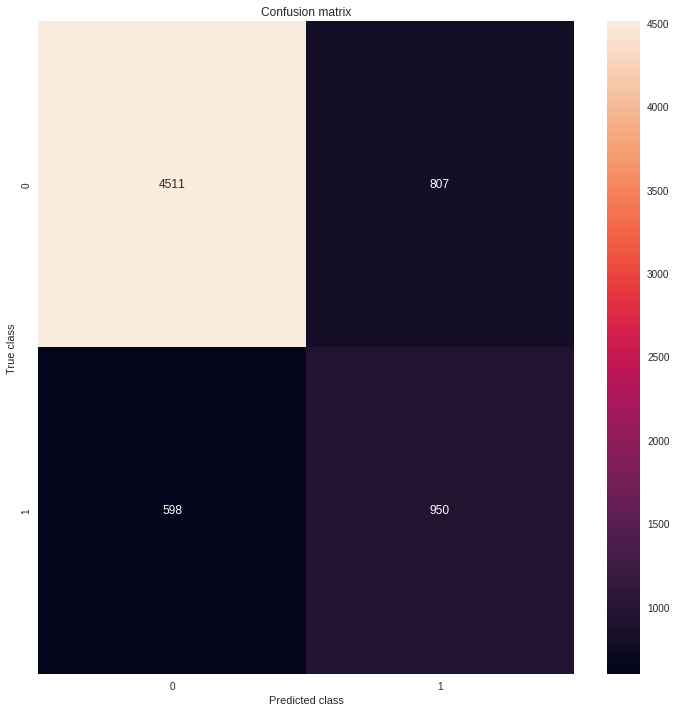

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      5318
           1       0.54      0.61      0.57      1548

    accuracy                           0.80      6866
   macro avg       0.71      0.73      0.72      6866
weighted avg       0.81      0.80      0.80      6866



In [53]:
from sklearn.tree import DecisionTreeClassifier

modelo3 = DecisionTreeClassifier()
modelo3.fit(X_train_res, y_train_res)

pred_y = modelo3.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


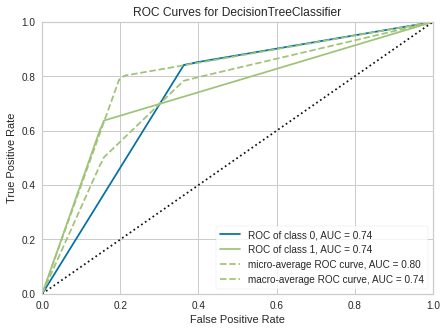

In [54]:
from yellowbrick.classifier import ROCAUC

viz = ROCAUC(modelo3,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


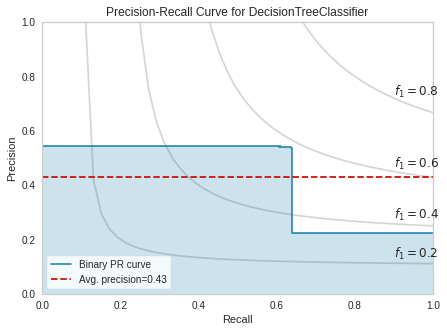

In [55]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(modelo3,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


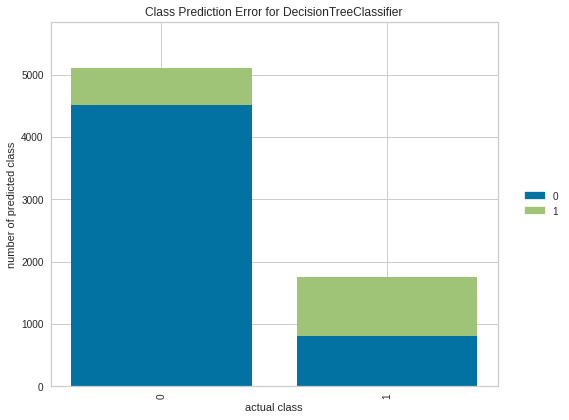

In [56]:
from yellowbrick.classifier import ClassPredictionError

viz = ClassPredictionError(modelo3,
                           fig=plt.figure(figsize=(9,6)))
viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

### Randomforest

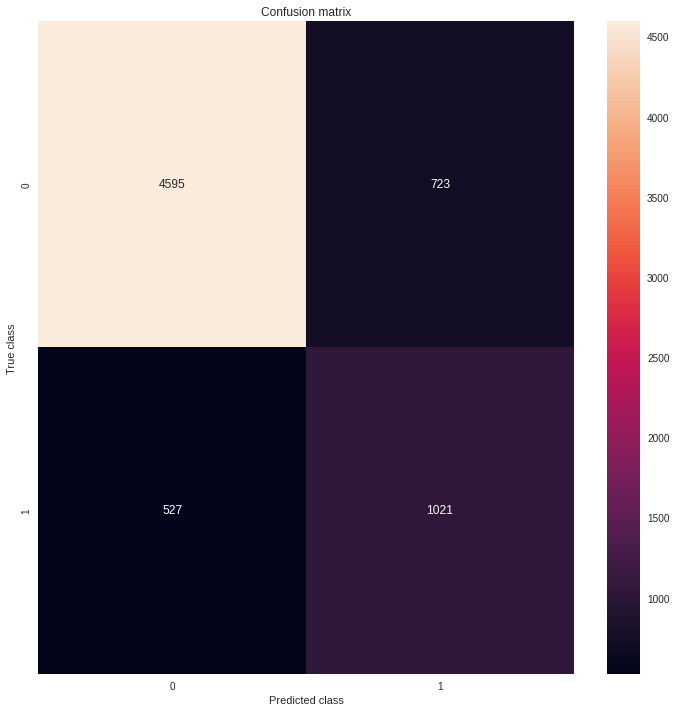

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      5318
           1       0.59      0.66      0.62      1548

    accuracy                           0.82      6866
   macro avg       0.74      0.76      0.75      6866
weighted avg       0.83      0.82      0.82      6866



In [57]:
from sklearn.ensemble import RandomForestClassifier

modelo4 = RandomForestClassifier()
modelo4.fit(X_train_res, y_train_res)

pred_y = modelo4.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


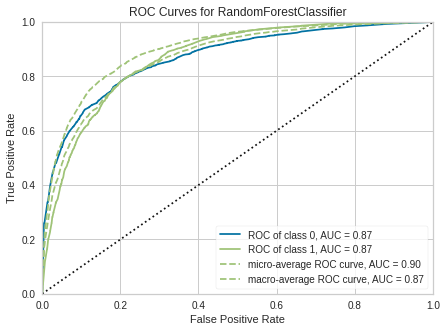

In [58]:
viz = ROCAUC(modelo4,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


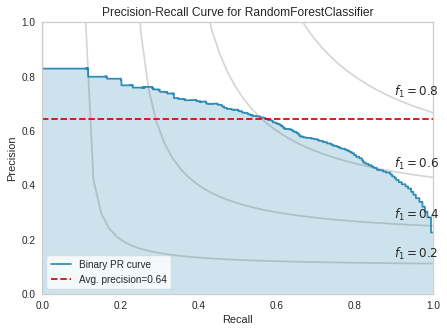

In [59]:
viz = PrecisionRecallCurve(modelo4,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


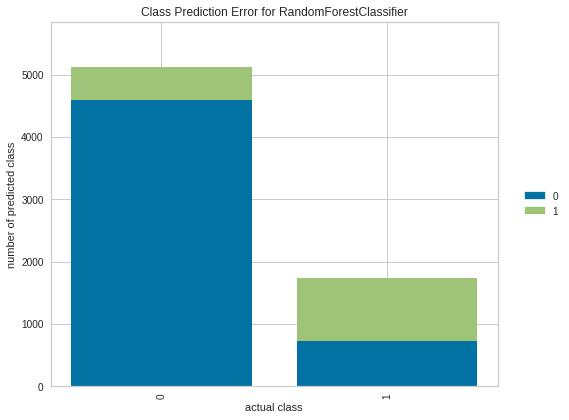

In [60]:
viz = ClassPredictionError(modelo4,
                           fig=plt.figure(figsize=(9,6)))
viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

### Xgboost

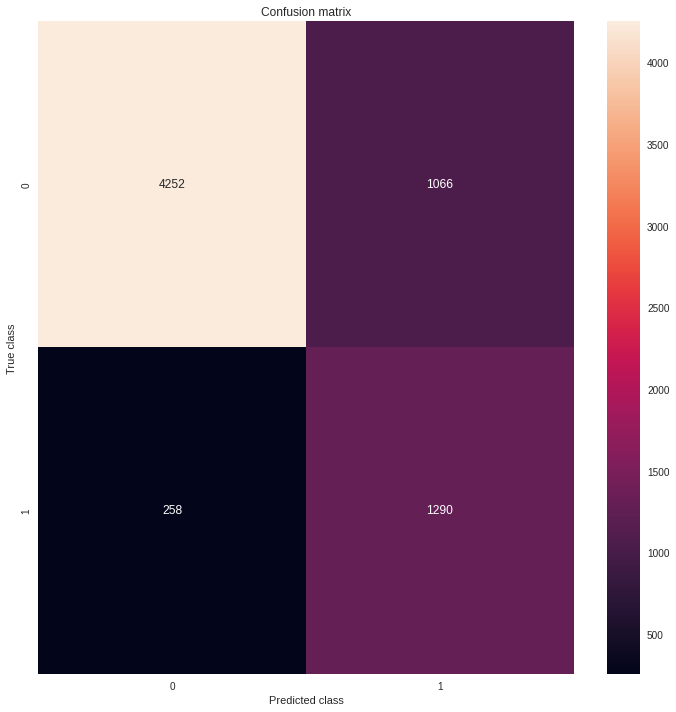

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      5318
           1       0.55      0.83      0.66      1548

    accuracy                           0.81      6866
   macro avg       0.75      0.82      0.76      6866
weighted avg       0.85      0.81      0.82      6866



In [61]:
from xgboost import XGBClassifier

modelo5 = XGBClassifier()
modelo5.fit(X_train_res, y_train_res)

pred_y = modelo5.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

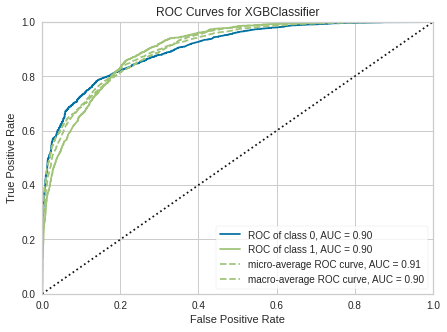

In [62]:
viz = ROCAUC(modelo5,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

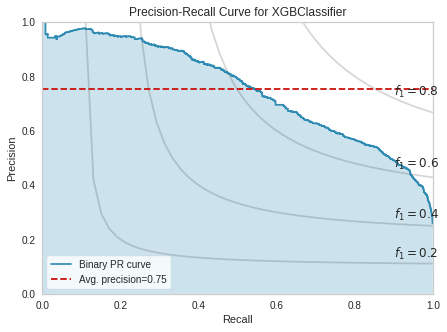

In [63]:
viz = PrecisionRecallCurve(modelo5,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

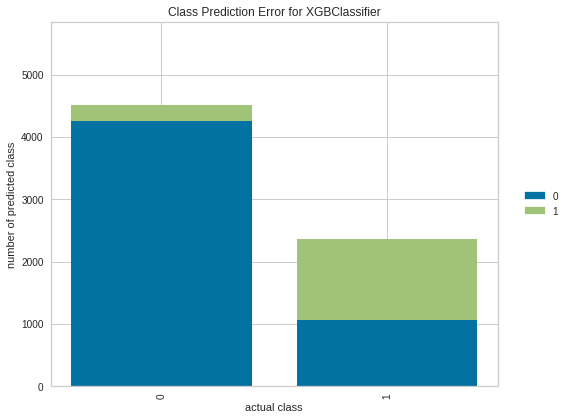

In [64]:
viz = ClassPredictionError(modelo5,
                           fig=plt.figure(figsize=(9,6)))
viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

### Ensemble model


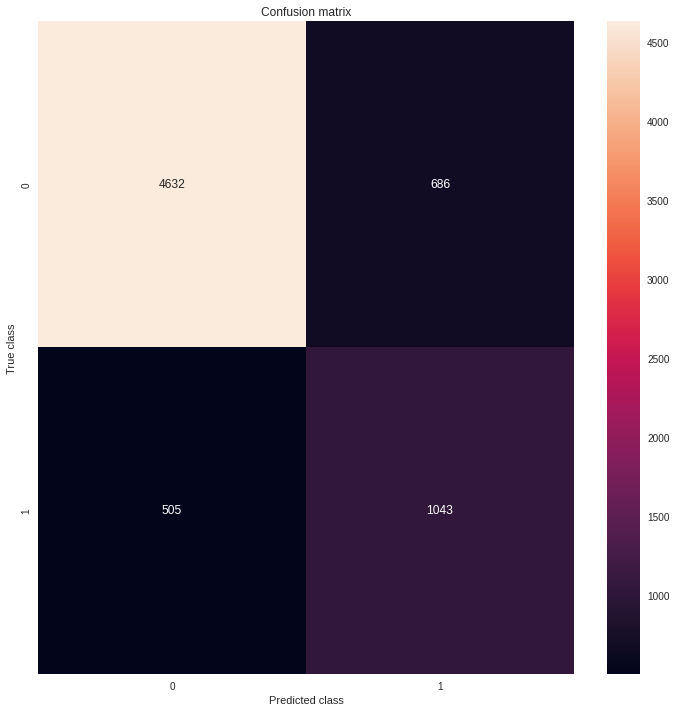

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      5318
           1       0.60      0.67      0.64      1548

    accuracy                           0.83      6866
   macro avg       0.75      0.77      0.76      6866
weighted avg       0.83      0.83      0.83      6866



In [65]:
from sklearn.ensemble import StackingClassifier

level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('xgb', XGBClassifier()))
level0.append(('rf', RandomForestClassifier()))
	# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
model.fit(X_train_res, y_train_res)
pred_y = model.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


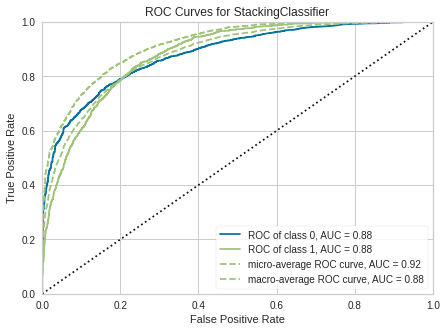

In [66]:
viz = ROCAUC(model,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


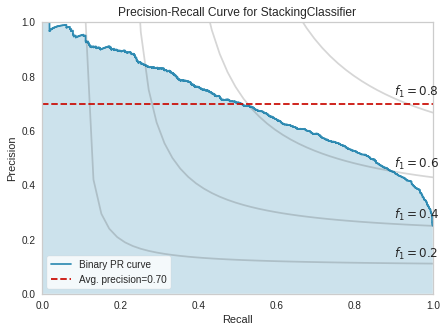

In [67]:
viz = PrecisionRecallCurve(model,
             ap_score=True,
             iso_f1_curves=True,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


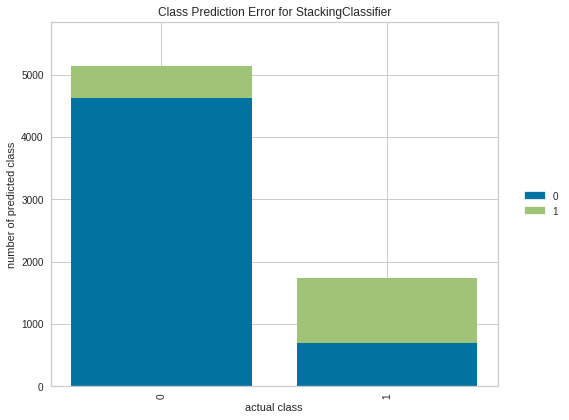

In [68]:
viz = ClassPredictionError(model,
                           fig=plt.figure(figsize=(9,6)))
viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

### Optimización de parametros para el  modelo randomforest

Para esta parte usaremos **optuna** la cual nos ayuda a la elección de hiperparametros por el metodo bayesiano el cual nos da una mejor elección optima de los hiperparametros. Usaremos el modelo random forest en donde solo probaremos tres hiperparametros.

In [ ]:
pip install optuna

In [70]:
from sklearn.model_selection import cross_val_score
import optuna
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [92]:
# Se crea una función la cual optimizara el modelo y hallara los mejores hiperparametros

def objective(trial):
    
    rf_max_depth = trial.suggest_int("rf_max_depth", 1, 5, log=True) # profundida de cada arbol
    rf_max_features = trial.suggest_int("rf_max_features",1,X_train_res.shape[1] ,log=True) # eleccion de caracteristicas
    rf_estimators = trial.suggest_int('rf_estimators', 10,1000,step=50) # numero de arboles
    classifier_obj = RandomForestClassifier(max_depth=rf_max_depth,n_estimators=rf_estimators,
                                            max_features = rf_max_features,random_state=123) # random_state es para poner una semilla
    classifier_obj.fit(X_train_res,y_train_res)
    y_pred_proba = classifier_obj.predict(X_test1)
    # usaremos la medida de ajuste f1
    f1 = f1_score(y_test1, y_pred_proba)
    return f1

Como se puede observar el modelo tuneado o optimizado da mejores resultados. Otras formas es mediante radom search o grid search, ocupa mucho poder de computo. Otra forma de hacerlo es mediante **hyperot**.

In [93]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

#get best parameters
print("\n\nBEST PARAMETERS : \n",study.best_params)

[I 2022-04-11 14:23:20,449] A new study created in memory with name: no-name-e8c7ce0b-5544-4866-a61d-d2bcca92e1ab
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning: The distribution is specified by [10, 1000] and step=50, but the range is not divisible by `step`. It will be replaced by [10, 960].
  low=low, old_high=old_high, high=high, step=step
[I 2022-04-11 14:23:24,375] Trial 0 finished with value: 0.5259429047718274 and parameters: {'rf_max_depth': 1, 'rf_max_features': 2, 'rf_estimators': 310}. Best is trial 0 with value: 0.5259429047718274.
/usr/local/lib/python3.7/dist-packages/optuna/distributions.py:563: UserWarning: The distribution is specified by [10, 1000] and step=50, but the range is not divisible by `step`. It will be replaced by [10, 960].
  low=low, old_high=old_high, high=high, step=step
[I 2022-04-11 14:23:29,574] Trial 1 finished with value: 0.5015662428597752 and parameters: {'rf_max_depth': 1, 'rf_max_features': 11, 'rf_estimators':



BEST PARAMETERS : 
 {'rf_max_depth': 5, 'rf_max_features': 15, 'rf_estimators': 560}


Esta es la mejor elección de hiperparametros: \\
BEST PARAMETERS : 
 {'rf_max_depth': 5, 'rf_max_features': 15, 'rf_estimators': 560}

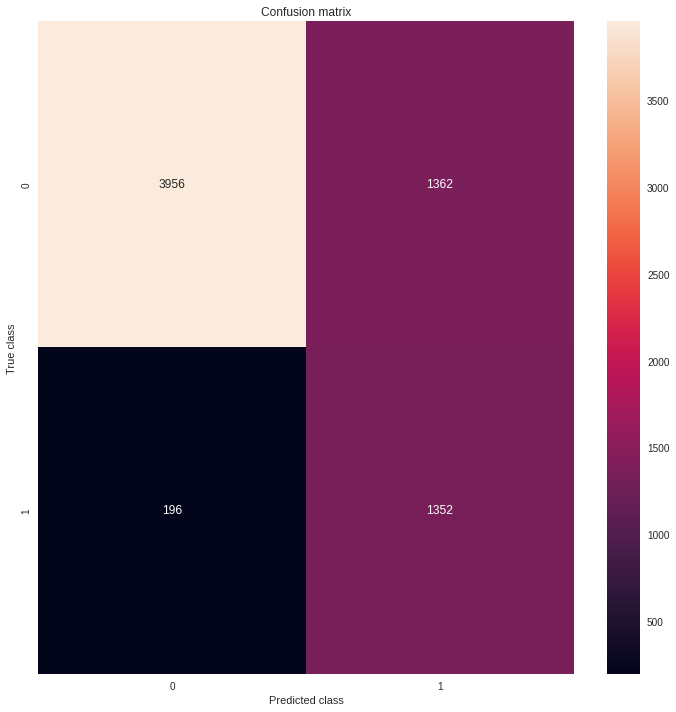

              precision    recall  f1-score   support

           0       0.95      0.74      0.84      5318
           1       0.50      0.87      0.63      1548

    accuracy                           0.77      6866
   macro avg       0.73      0.81      0.73      6866
weighted avg       0.85      0.77      0.79      6866



In [71]:
modelo4 = RandomForestClassifier(max_depth=5,max_features=15,n_estimators=560)
modelo4.fit(X_train_res, y_train_res)

pred_y = modelo4.predict(X_test1)
mostrar_resultados(y_test1, pred_y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


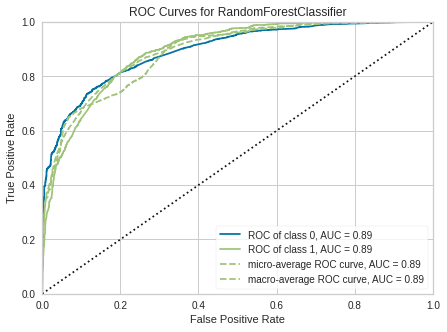

In [72]:
viz = ROCAUC(modelo4,
             fig=plt.figure(figsize=(7,5)))

viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


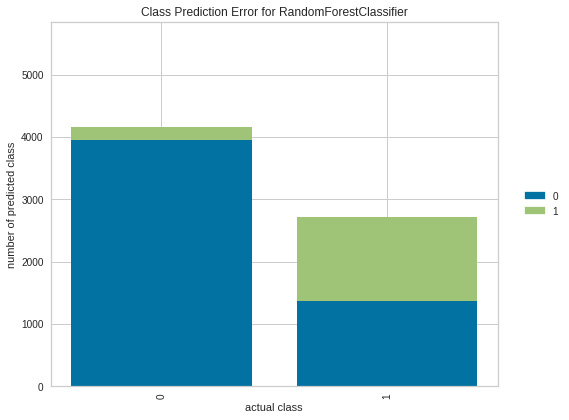

In [73]:
viz = ClassPredictionError(modelo4,
                           fig=plt.figure(figsize=(9,6)))
viz.fit(X_train_res, y_train_res)

viz.score(X_test1, y_test1)

viz.show();

In [ ]:
pip install shap

In [75]:
import shap

In [ ]:
explainer = shap.TreeExplainer(modelo4)
shap_values = explainer.shap_values(X_test1)

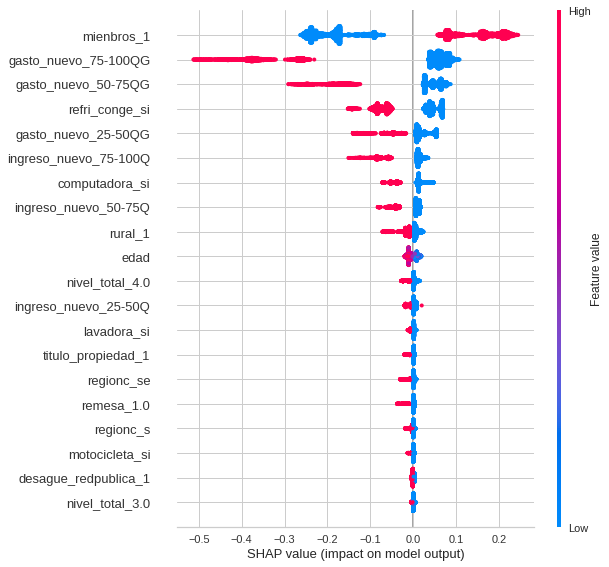

In [77]:
shap_values = explainer.shap_values(X_test1)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test1)

> La paqueteria shap nos ayuda a ver que variables influyen de manera positva y negativa en el modelo. Se obtuvo los mismos resultados que en el modelo logit.

## Pycaret

En esta parte usaremos la paqueteria de auto ML que practicamente nos resume todo lo que hemos hecho en pocas lineas de codigo y quedamos 🐔

In [20]:
import pandas as pd
data1= pd.read_csv("/content/datos.csv")
data1.nivel_total= data1.nivel_total.astype("str")

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
train,test  = train_test_split(data1, test_size = 0.30,random_state=123)

In [ ]:
pip install pycaret[full]

In [24]:
from pycaret.classification import *
model1 = setup(data = train #ponemos los datos
               , target = 'pobre' # la variable independiente o analizar
               , fix_imbalance=True # Balanceo de datos
               , session_id=123 # se coloca la semilla para que sea reproducible 
               )

,Description,Value
0,session_id,123
1,Target,pobre
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(24028, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [25]:
models = compare_models(n_select=3)
models

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8569,0.9043,0.5730,0.7295,0.6414,0.5537,0.5603,0.764
catboost,CatBoost Classifier,0.8563,0.9025,0.5873,0.7189,0.6461,0.5572,0.5619,22.534
gbc,Gradient Boosting Classifier,0.8548,0.9028,0.5892,0.7120,0.6445,0.5544,0.5585,4.574
xgboost,Extreme Gradient Boosting,0.8533,0.8988,0.5882,0.7072,0.6418,0.5506,0.5546,7.945
rf,Random Forest Classifier,0.8473,0.8827,0.5554,0.7005,0.6191,0.5253,0.5311,2.594
ada,Ada Boost Classifier,0.8473,0.8955,0.5977,0.6805,0.6358,0.5398,0.5420,1.196
et,Extra Trees Classifier,0.8352,0.8648,0.5730,0.6489,0.6085,0.5046,0.5063,2.554
dt,Decision Tree Classifier,0.8018,0.7200,0.5719,0.5554,0.5634,0.4353,0.4355,0.231
ridge,Ridge Classifier,0.7929,0.0000,0.8399,0.5232,0.6447,0.5095,0.5380,0.097
lda,Linear Discriminant Analysis,0.7929,0.8972,0.8399,0.5232,0.6447,0.5095,0.5380,0.205


[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
          

In [26]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8561,0.8968,0.5505,0.7393,0.6311,0.5441,0.5532
1,0.8555,0.9017,0.5532,0.7350,0.6313,0.5436,0.5521
2,0.8639,0.9140,0.6250,0.7276,0.6724,0.5871,0.5898
3,0.8514,0.8977,0.5638,0.7114,0.6291,0.5377,0.5434
4,0.8609,0.9028,0.5559,0.7572,0.6411,0.5573,0.5676
5,0.8615,0.9110,0.5718,0.7491,0.6486,0.5642,0.5722
6,0.8680,0.9148,0.6356,0.7377,0.6829,0.6001,0.6028
7,0.8526,0.9050,0.5718,0.7119,0.6342,0.5433,0.5484
8,0.8484,0.8925,0.5385,0.7148,0.6142,0.5222,0.5303


In [27]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8520,0.9008,0.5372,0.7292,0.6187,0.5294,0.5390
1,0.8532,0.9037,0.5532,0.7247,0.6275,0.5380,0.5457
2,0.8757,0.9166,0.6303,0.7720,0.6940,0.6170,0.6220
3,0.8514,0.8973,0.5745,0.7059,0.6334,0.5414,0.5460
4,0.8621,0.9079,0.5559,0.7628,0.6431,0.5602,0.5710
5,0.8656,0.9108,0.5638,0.7737,0.6523,0.5716,0.5826
6,0.8603,0.9145,0.6197,0.7169,0.6648,0.5771,0.5796
7,0.8537,0.9080,0.5771,0.7138,0.6382,0.5479,0.5527
8,0.8537,0.8959,0.5491,0.7314,0.6273,0.5386,0.5472


In [28]:
tuned_lightgbm

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

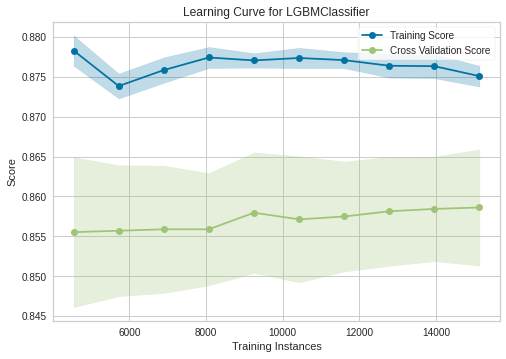

In [29]:
plot_model(estimator = tuned_lightgbm , plot= "learning")

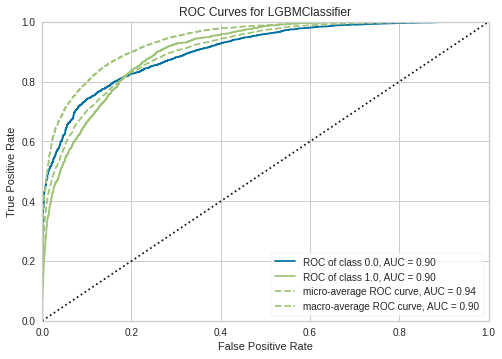

In [30]:
plot_model(estimator = tuned_lightgbm , plot= "auc")

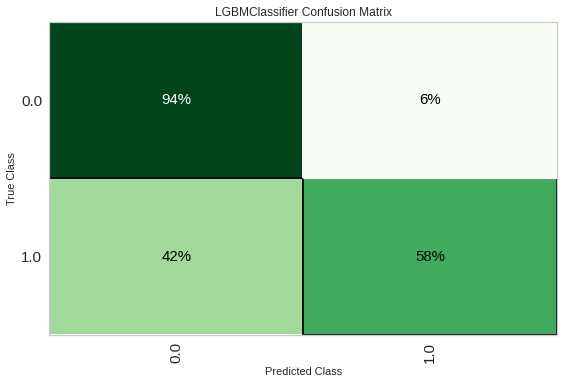

In [31]:
plot_model(estimator = tuned_lightgbm , plot= "confusion_matrix", plot_kwargs = {'percent' : True})

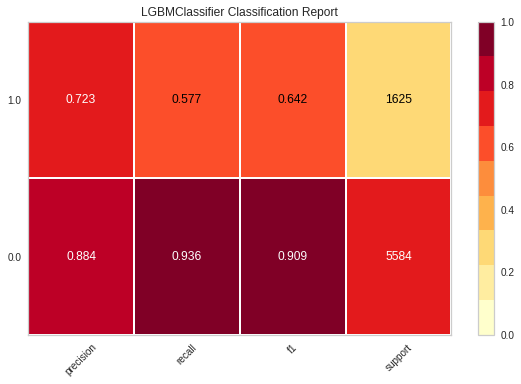

In [32]:
plot_model(estimator = tuned_lightgbm, plot = "class_report")

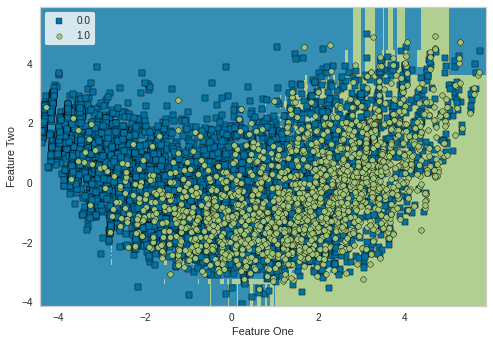

In [33]:
plot_model(estimator = tuned_lightgbm, plot = "boundary")

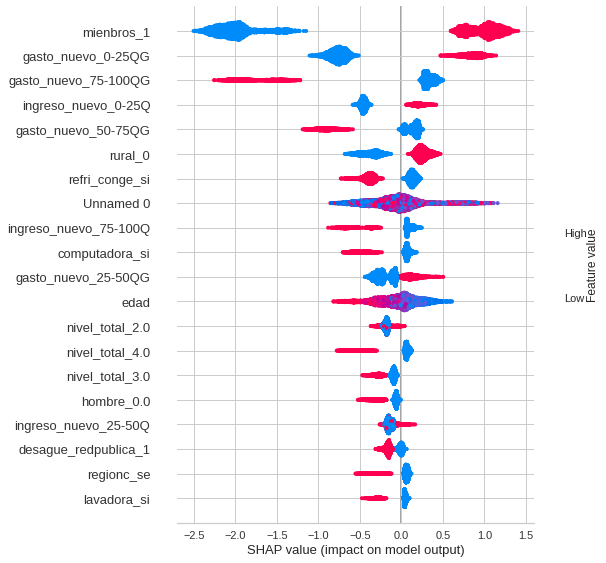

In [34]:
interpret_model(tuned_lightgbm)

In [35]:
pred = predict_model(tuned_lightgbm, data=test)
pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8595,0.9062,0.5802,0.7333,0.6478,0.5616,0.5676


,Unnamed: 0,pobre,agua_redpublica,desague_redpublica,alumbrado_publico,telefono_celular,nivel_total,lavadora,motocicleta,computadora,...,mienbros,rural,remesa,hombre,regionc,ingreso_nuevo,gasto_nuevo,edad,Label,Score
5137,5152,0.0,1,1,1.0,1.0,2.0,0,0,0,...,0,0,0.0,0.0,s,0-25Q,25-50QG,50.0,0.0,0.8760
13853,13911,0.0,0,0,0.0,0.0,1.0,0,0,0,...,1,1,0.0,1.0,se,25-50Q,0-25QG,68.0,1.0,0.7848
33194,33357,0.0,1,0,1.0,1.0,1.0,0,0,0,...,0,0,0.0,1.0,se,0-25Q,25-50QG,36.0,0.0,0.8350
11056,11082,0.0,1,1,1.0,1.0,3.0,0,0,0,...,0,0,0.0,1.0,c,25-50Q,25-50QG,61.0,0.0,0.8751
13091,13146,0.0,1,0,1.0,1.0,3.0,0,0,si,...,1,1,0.0,1.0,c,75-100Q,50-75QG,44.0,0.0,0.9185


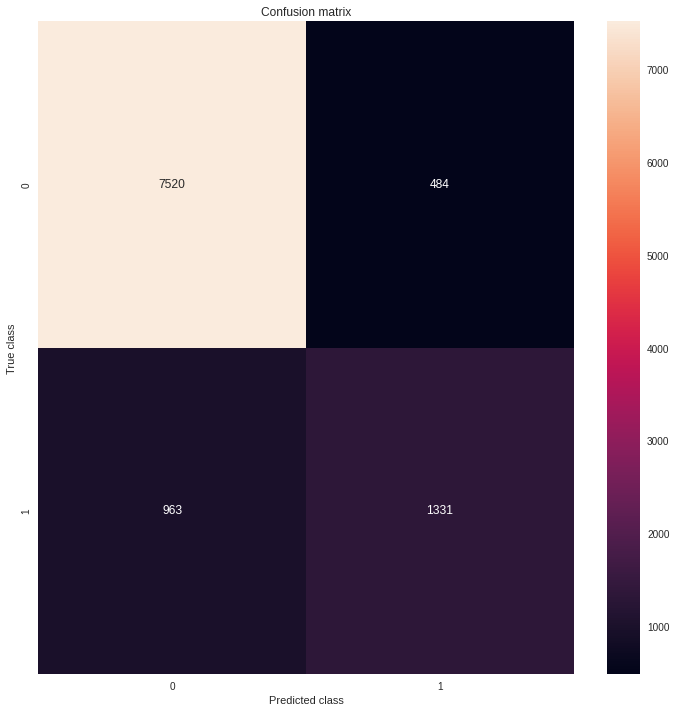

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8004
           1       0.73      0.58      0.65      2294

    accuracy                           0.86     10298
   macro avg       0.81      0.76      0.78     10298
weighted avg       0.85      0.86      0.85     10298



In [50]:
#def mostrar_resultados(y_test, pred_y)
mostrar_resultados(pred['pobre'].astype("int"), pred['Label'].astype("float"))